In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [220]:
google_apps = pd.read_csv('archivos_limpios/google_play_store_limpio.csv')
google_user = pd.read_csv('archivos_limpios/google_play_store_user_limpio.csv')

apps = google_apps.copy()
user = google_user.copy()


# Google apps 

### Utilidades: 

Enriquecimiento de los datos de uso: 
Al hacer cruces la información de tiempo en pantalla o secuencias de instalación con App, este DF te aporta contexto:

- Categoría (p. ej. “GAME”, “PRODUCTIVITY”)

- Género(s)

- Rating y Reviews (calidad y confianza de la comunidad)

- Installs (popularidad global)

- Type y Price (free vs paid)

- Content Rating (restricción etaria)

In [221]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [222]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   int64  
 4   Size            7424 non-null   float64
 5   Installs        8892 non-null   int64  
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   float64
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8888 non-null   object 
 12  Android Ver     8890 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 903.2+ KB


In [223]:
# obtener las columnas categoricas 
categorical_columns_app = apps.select_dtypes(include=['object']).columns.tolist()
categorical_columns_app

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [224]:
print("Cantidad total de apps:", apps["App"].nunique())
# No se si pasar get dummies ya que son muchos valores unicos
# Creo que nos conviene quitar los nombres y mejor dejar solo categorias, aun que se repitan muchas 

Cantidad total de apps: 8196


In [225]:
print("Cantidad total de apps:", apps["Category"].nunique())
print(apps["Category"].unique())

Cantidad total de apps: 33
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [226]:
print(apps["Content Rating"].unique())
print("Cantidad total de apps:", apps["Content Rating"].value_counts())
# Quitar la fila donde esta "Unrated" ya que es solo un caso y no aporta nada
apps = apps[apps["Content Rating"] != "Unrated"]

apps["Content Rating"] = apps["Content Rating"].map({"Everyone": 0,
                                                    "Teen": 1,
                                                    "Everyone 10+": 2,
                                                    "Mature 17+":3, 
                                                    "Adults only 18+": 4})

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']
Cantidad total de apps: Content Rating
Everyone           7095
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: count, dtype: int64


In [227]:
print(apps["Type"].unique())
# Pasar type a numerico
apps['Type'] = apps['Type'].map({'Free': 0, 'Paid': 1})

['Free' 'Paid']


In [228]:
print(apps["Genres"].value_counts()) # es como categoria o alfo aso 

Genres
Tools                          732
Entertainment                  498
Education                      446
Action                         349
Productivity                   334
                              ... 
Casual;Music & Video             1
Board;Pretend Play               1
Health & Fitness;Education       1
Music & Audio;Music & Video      1
Strategy;Creativity              1
Name: count, Length: 115, dtype: int64


In [229]:
drops = ['Last Updated',
 'Current Ver',
 'Android Ver', "Size"]
# Quitar columnas que no aportan nada
apps = apps.drop(columns=drops)
apps.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,0,0.0,0,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,0,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,0,0.0,0,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,0,0.0,1,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,0,0.0,0,Art & Design;Creativity


In [230]:
# guardar el csv limpio
apps.to_csv('apps.csv', index=False)

## Graficos y analisis

In [231]:
apps.describe()

,Rating,Reviews,Installs,Type,Price,Content Rating
count,8891.000000,8.891000e+03,8.891000e+03,8891.000000,8891.000000,8891.000000
mean,4.187887,4.728294e+05,1.649150e+07,0.068946,0.963263,0.335958
std,0.522405,2.905211e+06,8.638068e+07,0.253377,16.190248,0.765209
min,1.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000
25%,4.000000,1.640000e+02,1.000000e+04,0.000000,0.000000,0.000000
50%,4.300000,4.719000e+03,5.000000e+05,0.000000,0.000000,0.000000
75%,4.500000,7.126750e+04,5.000000e+06,0.000000,0.000000,0.000000
max,5.000000,7.815831e+07,1.000000e+09,1.000000,400.000000,4.000000


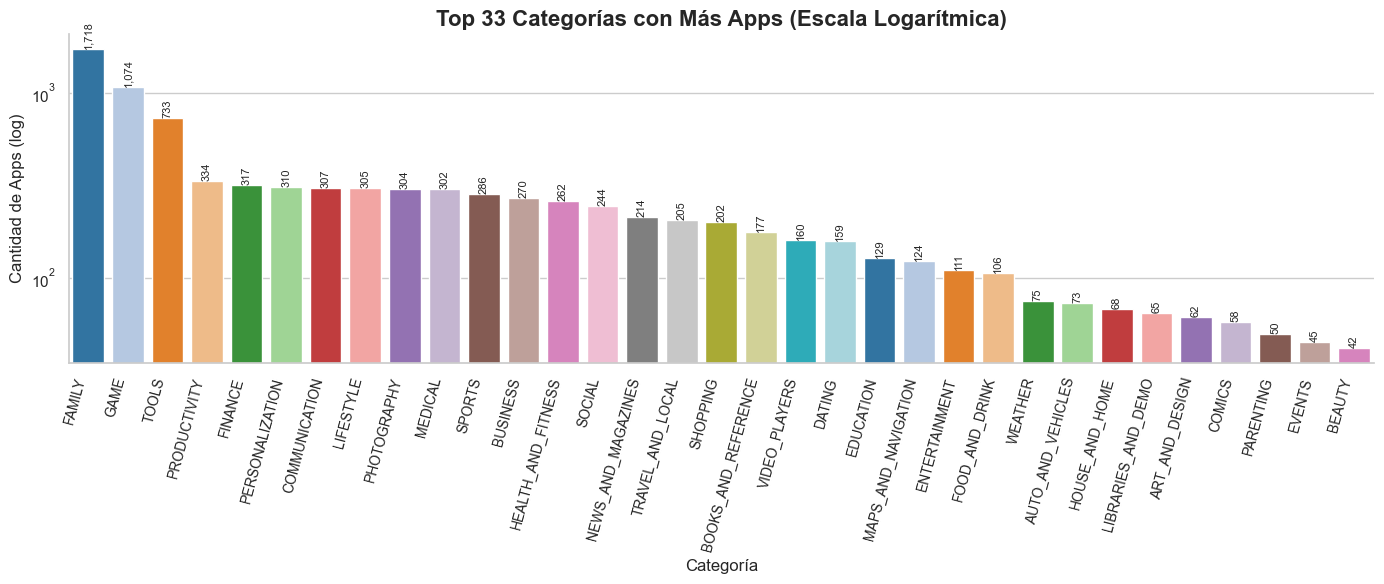

In [232]:
plt.figure(figsize=(14, 6))
bars = apps['Category'].value_counts().head(33)
sns.barplot(
    x=bars.index,
    y=bars.values,
    palette="tab20"
)
plt.yscale('log')
plt.title("Top 33 Categorías con Más Apps (Escala Logarítmica)", fontsize=16, fontweight='bold')
plt.xlabel("Categoría", fontsize=12)
plt.ylabel("Cantidad de Apps (log)", fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)
for i, v in enumerate(bars.values):
    plt.text(i, v, f"{v:,}", ha='center', va='bottom', fontsize=8, rotation=90)
sns.despine()
plt.tight_layout()
plt.show()

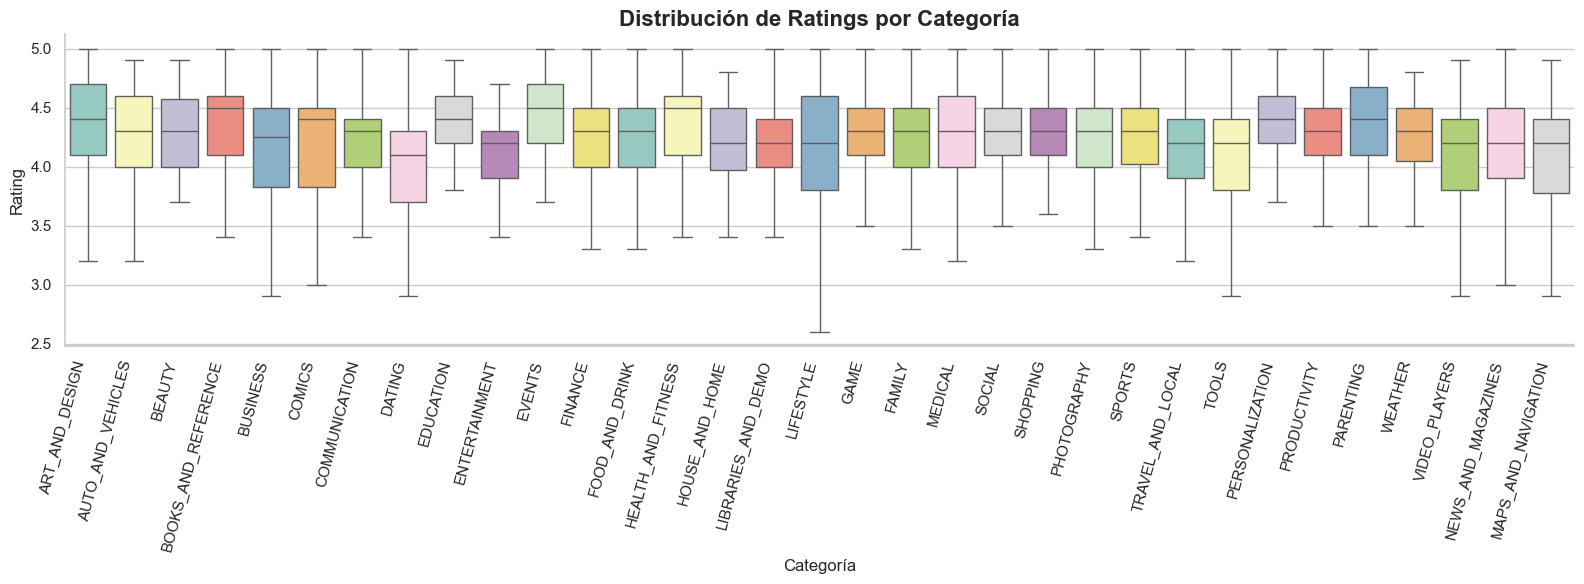

In [233]:
plt.figure(figsize=(16, 6))
sns.boxplot(
    x='Category',
    y='Rating',
    data=apps,
    palette='Set3',
    showfliers=False
)
plt.xticks(rotation=75, ha='right')
plt.title("Distribución de Ratings por Categoría", fontsize=16, fontweight='bold')
plt.xlabel("Categoría", fontsize=12)
plt.ylabel("Rating", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()


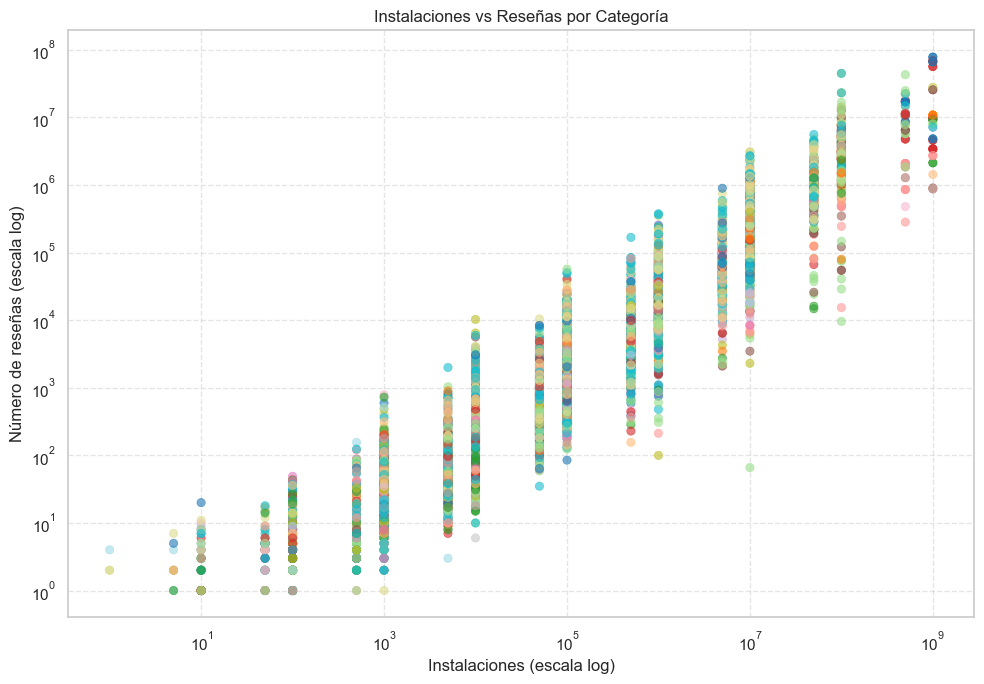

In [234]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=apps,
    x="Installs",
    y="Reviews",
    hue="Category", # opcional
    alpha=0.6,
    edgecolor=None,
    palette="tab20",
    legend=False
)
plt.xscale("log")
plt.yscale("log")
plt.title("Instalaciones vs Reseñas por Categoría")
plt.xlabel("Instalaciones (escala log)")
plt.ylabel("Número de reseñas (escala log)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

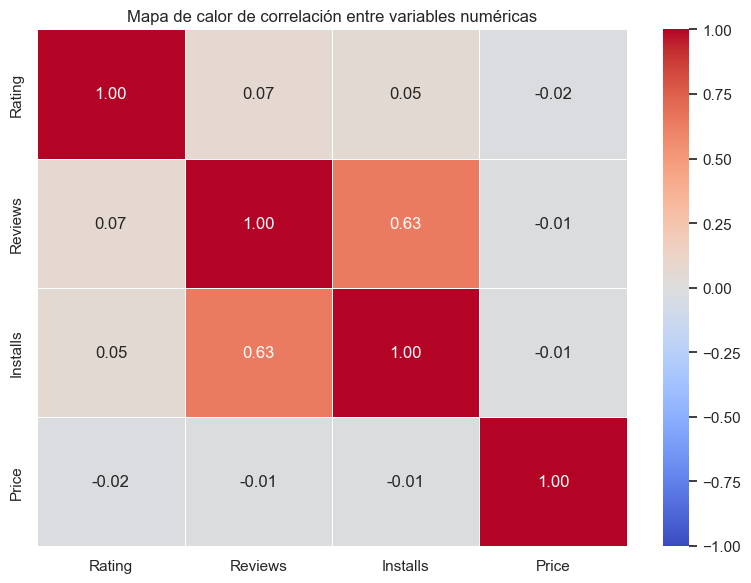

In [235]:
num_cols = ['Rating', 'Reviews', 'Installs', 'Price']

corr = apps[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5
)
plt.title("Mapa de calor de correlación entre variables numéricas")
plt.tight_layout()
plt.show()

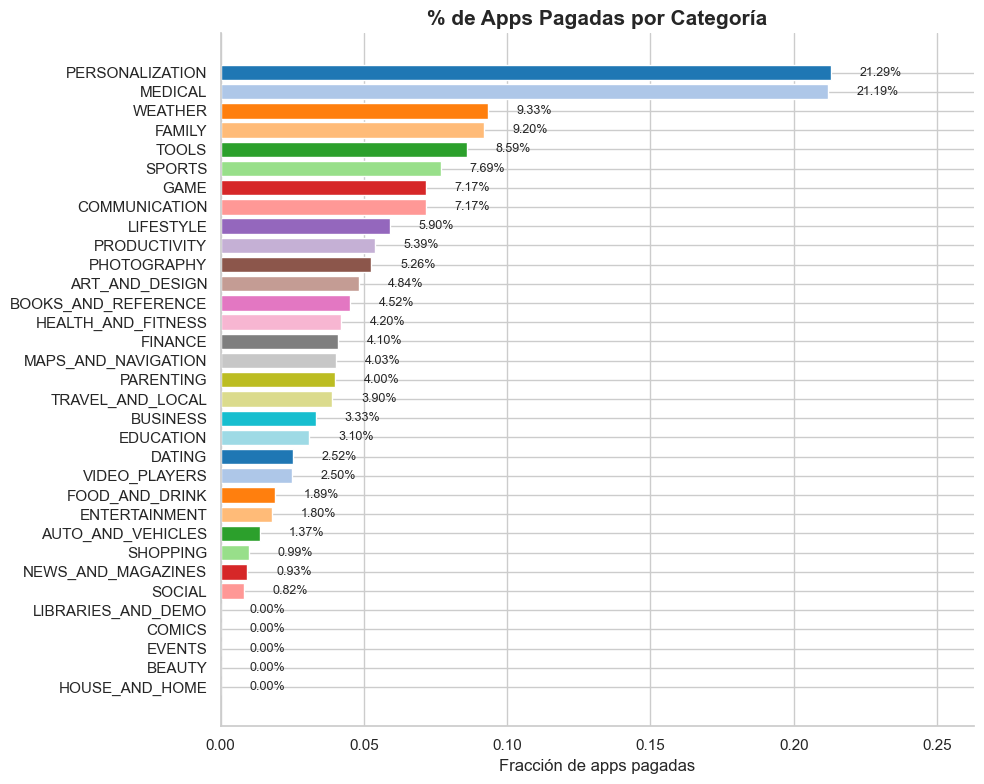

In [236]:
# % de apps pagadas por categoría
pct = (apps.groupby("Category")["Type"]
         .mean()
         .sort_values(ascending=False)
      )

plt.figure(figsize=(10, 8))
bars = plt.barh(pct.index, pct.values, color=sns.color_palette("tab20", len(pct)))
plt.xlabel("Fracción de apps pagadas", fontsize=12)
plt.title("% de Apps Pagadas por Categoría", fontsize=15, fontweight='bold')
plt.xlim(0, pct.max() + 0.05)
plt.gca().invert_yaxis()
for i, v in enumerate(pct.values):
    plt.text(v + 0.01, i, f"{v:.2%}", va='center', fontsize=9)
sns.despine()
plt.tight_layout()
plt.show()


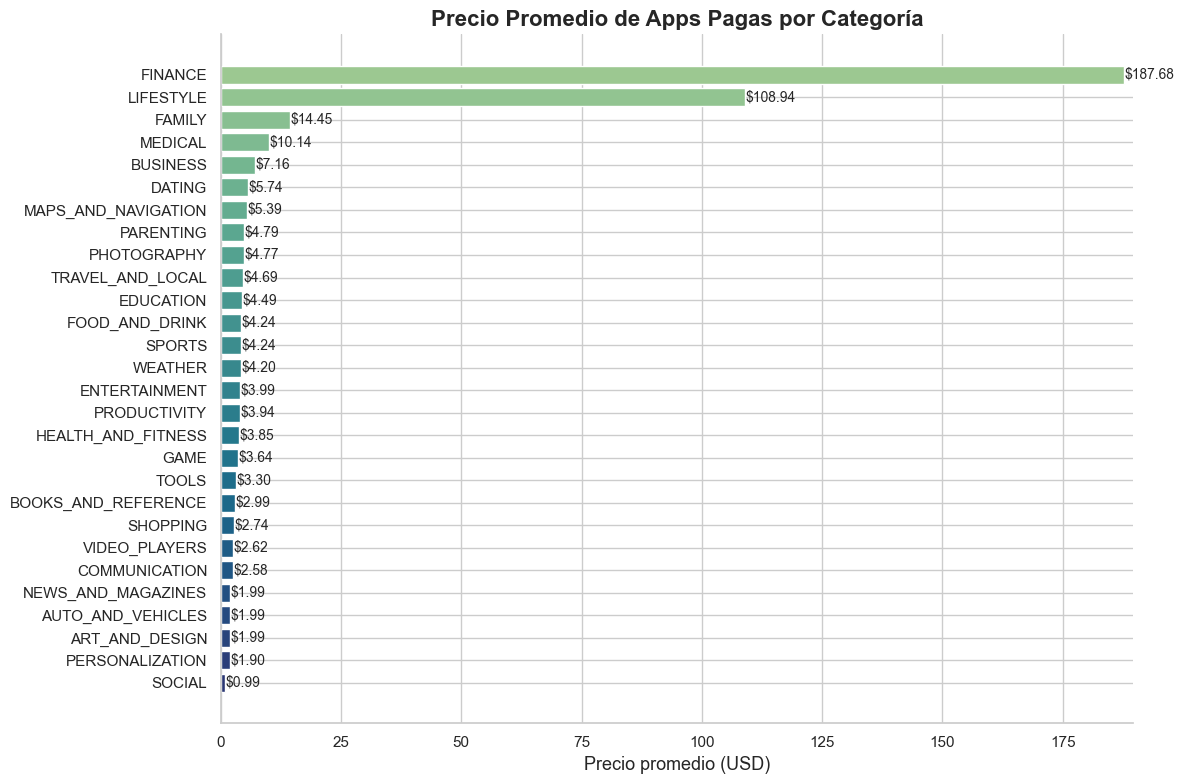

In [237]:
# Precio promedio por categoría
avg_price = apps[apps.Price > 0].groupby("Category")["Price"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(avg_price.index, avg_price.values, color=sns.color_palette("crest", len(avg_price)))
plt.xlabel("Precio promedio (USD)", fontsize=13)
plt.title("Precio Promedio de Apps Pagas por Categoría", fontsize=16, fontweight='bold')
plt.xlim(0, avg_price.max() + 2)
plt.gca().invert_yaxis()
for i, v in enumerate(avg_price.values):
    plt.text(v + 0.1, i, f"${v:.2f}", va='center', fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()


In [238]:
pd.pivot_table(
    apps,
    index="Category",
    values=["App", "Rating", "Installs", "Type"],
    aggfunc={"App": "count", "Rating": "mean", "Installs": "mean", "Type": lambda x: x.mode()[0]}
)


,App,Installs,Rating,Type
Category,,,,
ART_AND_DESIGN,62,2.003760e+06,4.358065,0
AUTO_AND_VEHICLES,73,7.278055e+05,4.190411,0
BEAUTY,42,6.408619e+05,4.278571,0
BOOKS_AND_REFERENCE,177,1.082651e+07,4.347458,0
BUSINESS,270,3.198215e+06,4.102593,0
COMICS,58,9.661397e+05,4.155172,0
COMMUNICATION,307,7.867180e+07,4.151466,0
DATING,159,1.298883e+06,3.971698,0
EDUCATION,129,4.138388e+06,4.375969,0


# Google usuarios 

In [239]:
google_user.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [240]:
google_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


In [241]:
user = google_user.copy()

In [ ]:
print(user["Sentiment"].value_counts())
# pasar los valores de Sentiment a numéricos
user["Sentiment"] = google_user["Sentiment"].map({"Positive": 1, "Negative": -1, "Neutral": 0})

Sentiment
Positive    19015
Negative     6321
Neutral      4356
Name: count, dtype: int64


In [251]:
user["Sentiment_Polarity"].max(), user["Sentiment_Polarity"].min()

(np.float64(1.0), np.float64(-1.0))

In [253]:
user["Sentiment_Subjectivity"].max(), user["Sentiment_Subjectivity"].min()

(np.float64(1.0), np.float64(0.0))

In [ ]:
print(user["Translated_Review"].value_counts()) # si lo vamos a usar tenemos que usar lo de Datos Masivos

Translated_Review
Good                                                                                                                          137
Nice                                                                                                                          105
Great                                                                                                                          90
Love                                                                                                                           81
Awesome                                                                                                                        55
                                                                                                                             ... 
Easy use--love ability review items added/subtracted like adding machine tape!                                                  1
Excellent far. The name icon spelled fully, I think                     

In [248]:
user["App"].value_counts()

App
Facebook                          130
Episode - Choose Your Story       124
Angry Birds Classic               107
Family Locator - GPS Tracker      105
Google Photos                     101
                                 ... 
Caller ID +                         1
Free Live Talk-Video Call           1
CBS News                            1
Calendar+ Schedule Planner App      1
Draw a Stickman: EPIC 2             1
Name: count, Length: 865, dtype: int64

In [254]:
# Pasar user a csv limpio
user.to_csv('user.csv', index=False)

In [256]:
# juntar los dos dataframes por la columna App
merged_df = pd.merge(apps, user, on="App", how="inner") 
merged_df.head()


,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,0,Art & Design;Pretend Play,A kid's excessive ads. The types ads allowed a...,-1,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,0,Art & Design;Pretend Play,It bad >:(,-1,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,0,Art & Design;Pretend Play,like,0,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,0,Art & Design;Pretend Play,I love colors inspyering,1,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,0,Art & Design;Pretend Play,I hate,-1,-0.800,0.900000


In [258]:
merged_df.describe()

,Rating,Reviews,Installs,Type,Price,Content Rating,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,40376.000000,4.037600e+04,4.037600e+04,40376.000000,40376.000000,40376.000000,40376.000000,40376.000000,40376.000000
mean,4.324638,2.199064e+06,5.906664e+07,0.009164,0.076897,0.369997,0.396473,0.168116,0.495104
std,0.285923,7.457689e+06,1.714334e+08,0.095290,1.131878,0.794027,0.847086,0.343302,0.250464
min,2.600000,4.600000e+01,1.000000e+03,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,4.200000,1.703000e+04,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.373333
50%,4.400000,1.114500e+05,1.000000e+07,0.000000,0.000000,0.000000,1.000000,0.136364,0.512963
75%,4.500000,1.468638e+06,5.000000e+07,0.000000,0.000000,0.000000,1.000000,0.388889,0.645984
max,4.900000,7.815831e+07,1.000000e+09,1.000000,29.990000,4.000000,1.000000,1.000000,1.000000


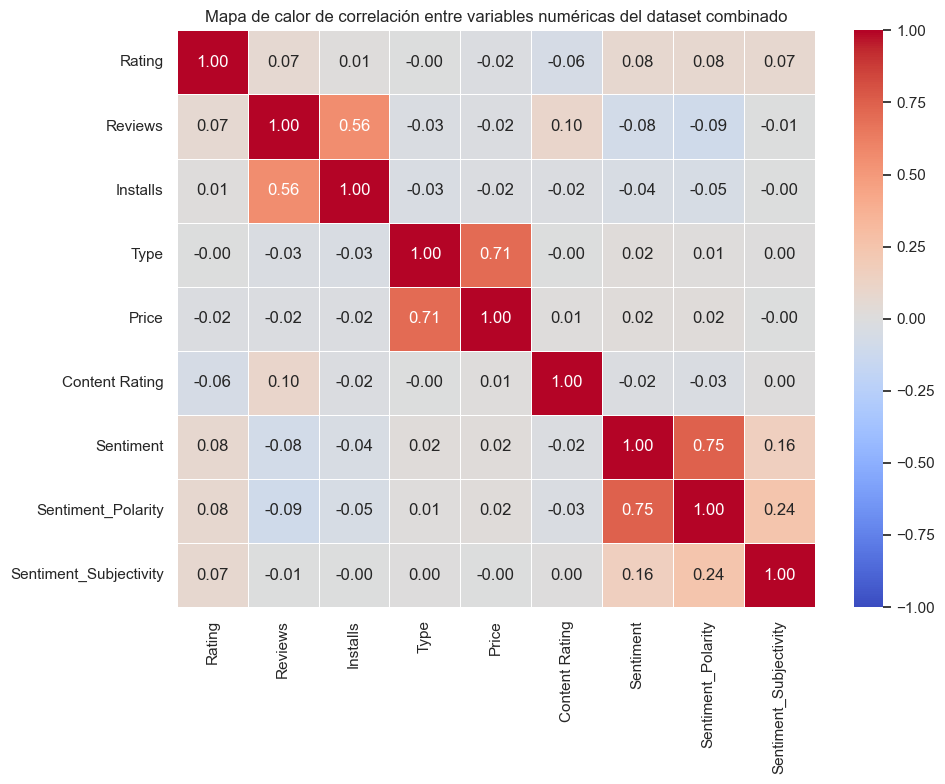

In [261]:
# Seleccionar solo las columnas numéricas para la correlación
numeric_cols = merged_df.select_dtypes(include=['number'])
corr = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5
)
plt.title("Mapa de calor de correlación entre variables numéricas del dataset combinado")
plt.tight_layout()
plt.show()
